In [1]:
import numpy as np   #importing numpy package for initialising the arrays to zeros
import pandas as pd

In [2]:
n = int(input("Enter number of sensors: "))  #number of sensors

Enter number of sensors: 101


In [3]:
p = float(input("Enter the value of p: "))   #probability

Enter the value of p: 0.4


In [4]:
k = int(input("Enter the value of k: "))  #number of neighbor sensors

Enter the value of k: 3


In [5]:
theta1 = float(input("Enter the value of theta1: "))  #theta1 value

Enter the value of theta1: 2


In [6]:
theta2 = float(input("Enter the value of theta2: "))   #theta2 value

Enter the value of theta2: 1


In [7]:
dat = pd.read_csv('C:/Users/LALITH/Downloads/2.csv', engine='python',names=['t','t1'])

In [8]:
st = dat['t'].to_numpy()

In [9]:
dt = np.zeros((int(n-1),int(n-1)))
for i in range(len(dt[0])):
    for j in range(len(dt[0])):
        dt[i][j] = abs(st[i] - st[j])    

In [10]:
st1 = dat['t1'].to_numpy()

In [11]:
len(st)

101

In [12]:
dt1 = np.zeros((int(n-1),int(n-1)))
for i in range(len(dt1[0])):
    for j in range(len(dt1[0])):
        dt1[i][j] = abs(st1[i] - st1[j])            # calculating the difference between the positions

In [13]:
dt1  #distance matrix at time t+1

array([[  0.,  72., 101., ..., 222., 101.,  86.],
       [ 72.,   0.,  29., ..., 150.,  29.,  14.],
       [101.,  29.,   0., ..., 121.,   0.,  15.],
       ...,
       [222., 150., 121., ...,   0., 121., 136.],
       [101.,  29.,   0., ..., 121.,   0.,  15.],
       [ 86.,  14.,  15., ..., 136.,  15.,   0.]])

In [14]:
deltad = dt1 - dt
deltad                  #value of delta d, which is the difference of the distances at time t and time t+1{(xi(t+1)-xj(t+1)) - (xi(t)-xj(t))}

array([[   0.,  -74.,   30., ...,  131.,   77.,  -56.],
       [ -74.,    0.,  -46., ...,   95.,  -93.,   10.],
       [  30.,  -46.,    0., ...,  101.,  -47.,  -56.],
       ...,
       [ 131.,   95.,  101., ...,    0.,   54.,   85.],
       [  77.,  -93.,  -47., ...,   54.,    0., -103.],
       [ -56.,   10.,  -56., ...,   85., -103.,    0.]])

In [15]:
c = np.zeros((int(n), int(n)))   #initialising the c to zeros

In [16]:
for i in range(len(dt[0])):
    for j in range(len(dt[0])):
        if dt[i][j] > theta1:
            if deltad[i][j] > theta2:
                c[i][j] = 1            # assigning value 1 to c when these conditions are satisfied

In [17]:
c

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
if k%2==0:
    m = (k/2) + 1
else:
    m = (k+1)/2        #calculating the value of m when k is even and when k is odd

In [19]:
tflf = 0
for i in range(0,int(m)):
    tflf = tflf + c[i][k]*((1-p)**(k-i))*(p**i)

In [20]:
pflf = p*tflf                     #calculation of pflf formula
pflf

0.144

In [21]:
tglf = 0
for j in range(0,int(m)):
    tglf = tglf + c[j][k]*((1-p)**j)*(p**(k-j))

In [22]:
pglf = (1-p)*tglf               #calculation of pglf formula
pglf                  

0.09600000000000002

In [23]:
tflg = 0
for j in range(0,int(m)):
    tflg = tflg + c[j][k]*((1-p)**j)*(p**(k-j))

In [24]:
pflg = p*tflg                   #calculation of pflg formula
pflg

0.06400000000000002

In [25]:
tglg = 0
for i in range(0,int(m)):
    tglg = tglg + c[i][k] * ((1-p)**(k-i)) * (p**i)

In [26]:
pglg = (1-p)*tglg                #calculation of pglg formula
pglg 

0.216

In [41]:
tfg = 0
tfg1 = 0
tfg2 = 0

for x in range(1,k+1):
    if x%2==0:
        n = (x/2) + 1
    else:
        n = (x+1)/2
    for y in range(0,int(n)):
        
        tfg1 = tfg1 + c[y][x] * (pglg**y) * (pflg**(x-y))
    for a in range(0,k-x+1):
    
        tfg2 = tfg2 + c[a][k-x] * (pglf**a) * (pflf**(k-x-a))
        
    tfg = tfg + c[x][k] * tfg1 * tfg2

    
tfg3 = 0
for a in range(0,k+1):
    
    tfg3 = tfg3 + c[a][k] * (pglf**a) * (pflf**(k-a))

In [42]:
pfg = (p * tfg) + (pflg * tfg3)    #calculation of pfg formula
pfg


0.0004374134784000001

In [43]:
tgf = 0
tgf1 = 0
tgf2 = 0

for x in range(1,k+1):
    if x%2==0:
        n = (x/2) + 1
    else:
        n = (x+1)/2
    for y in range(0,int(n)):
        
        tgf1 = tgf1 + c[y][x] * (pglg**y) * (pflg**(x-y))
    for a in range(0,k-x+1):
        
        tgf2 = tgf2 + c[a][k-x] * (pglf**a) * (pflf**(k-x-a))
        
    tgf = tgf + c[x][k] * tgf1 * tgf2

    
tgf3 = 0
for a in range(0,k+1):
    
    tgf3 = tgf3 + c[a][k] * (pglf**a) * (pflf**(k-a))

In [44]:
pgf = ((1-p) * tfg) + (pglf * tfg3)            #calculation of pgf formula
pgf

0.0006561202176000001

In [45]:
tgg = 0
tgg1 = 0
tgg2 = 0

for x in range(1,k+1):
    if x%2==0:
        n = (x/2) + 1
    else:
        n = (x+1)/2
    for z in range(0,int(n)):
        
        tgg1 = tgg1 + c[z][x] * (pglg**y) * (pflg**(x-y))
    for a in range(0,k-x+1):
        
        tgg2 = tgg2 + c[a][k-x] * (pglf**a) * (pflf**(k-x-a))
        
    tgg = tgg + c[x][k] * tgg1 * tgg2

    
tgg3 = 0
for a in range(0,k+1):
    
    tgg3 = tgg3 + c[a][k] * (pglf**a) * (pflf**(k-a))

In [46]:
pgg = ((1-p) * tfg) + (pglg * tfg3)                #calculation of pgg formula
pgg

0.0014125694976

In [47]:
tff = 0
tff1 = 0
tff2 = 0

for x in range(1,k+1):
    if x%2==0:
        n = (x/2) + 1
    else:
        n = (x+1)/2
    for z in range(0,int(n)):
        
        tff1 = tff1 + c[z] * (pglg**(x-z)) * (pflg**z)
    for a in range(0,k-x+1):
        
        tff2 = tff2 + c[a] * (pglf**a) * (pflf**(k-x-a))
        
    tff = tff + c[x] * tff1 * tff2

    
tff3 = 0
for a in range(0,k+1):
    
    tff3 = tff3 + c[a] * (pglf**a) * (pflf**(k-a))

In [48]:
pff = (p * tfg) + (pflf * tfg3)               #calculation of pff formula
pff

0.0009417129984

In [49]:
pewfs = pgg + pfg + pgf + pff                 #calculation of pewfs formula

In [50]:
pewfs


0.0034478161920000003

In [37]:
import pandas as pd

In [51]:
df = pd.DataFrame({'Improved_DFD_Algorithm':[0.967,0.995,0.998,1], 'Average_number_of_neighbor_nodes':[5,10,15,20], 'DFD_Algorithm':[0.89,0.93,0.94,0.95]})

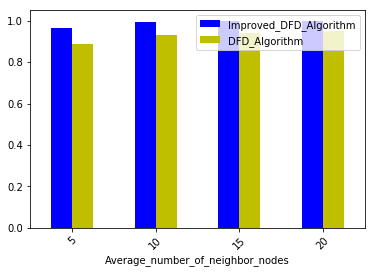

In [52]:
ax = df[['Average_number_of_neighbor_nodes', 'Improved_DFD_Algorithm', 'DFD_Algorithm']].plot(x='Average_number_of_neighbor_nodes', kind='bar',color=["b","y"],rot=45)


In [53]:
ax

In [1]:
import matplotlib.pyplot as plt

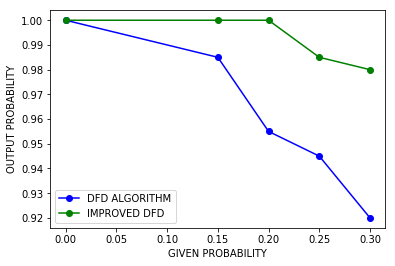

In [2]:
plt.plot([0,0.15,0.2,0.25,0.3],[1.0,0.985,0.955,0.945,0.92],'-b',marker='o', label='DFD ALGORITHM') #x-axis points, y-axis points, color, marker to highlight coordinates, labeling for marking legend
plt.plot([0,0.15,0.2,0.25,0.3],[1.0,1.0,1.0,0.985,0.98],'-g',marker='o',label='IMPROVED DFD')
plt.xlabel("GIVEN PROBABILITY")#x-label
plt.ylabel("OUTPUT PROBABILITY")#y-label
plt.legend()